In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import os,glob
from PIL import Image
import tensorflow as tf
!pip install --upgrade tensorflow
!pip install tensorflow keras
import matplotlib.image as image
import seaborn as sns
from PIL import Image
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
import random
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from keras.utils.np_utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

In [2]:
from numpy.random import seed
seed(1)

import tensorflow
tensorflow.random.set_seed(2)

In [3]:
dir_path = r'C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\data\BirdVsDrone'
digits = sorted(os.listdir(dir_path))
NUM_CLASSES = len(digits)
print(digits)
print('Number of classes : ', NUM_CLASSES)

['Birds', 'Drones']
Number of classes :  2


In [4]:
bird_path=r'C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\data\BirdVsDrone\Birds'
drone_path=r'C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\data\BirdVsDrone\Drones'

In [5]:
bird_path_grey='./BirdsGray'
drone_path_grey='./DronesGray'

In [6]:
#create an empty DataFrame for RGB images
df = pd.DataFrame(columns=['path','label'])

#loop over bird images and label them 1
for dirname, _, filenames in os.walk(bird_path):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'bird']],columns=['path','label']))

#loop over Drone images and label them 0
for dirname, _, filenames in os.walk(drone_path):
    for filename in filenames:
        df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'drone']],columns=['path','label']))
        #print(os.path.join(dirname, filename))

#shuffle the dataset for redistribute the labels
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,path,label
0,C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assi...,bird
1,C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assi...,drone
2,C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assi...,drone
3,C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assi...,drone
4,C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assi...,drone
5,C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assi...,bird
6,C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assi...,drone
7,C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assi...,drone
8,C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assi...,drone
9,C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assi...,drone


In [7]:
df.shape

(828, 2)

<AxesSubplot:>

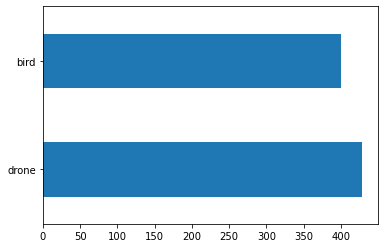

In [8]:
df['label'].value_counts().plot.barh()

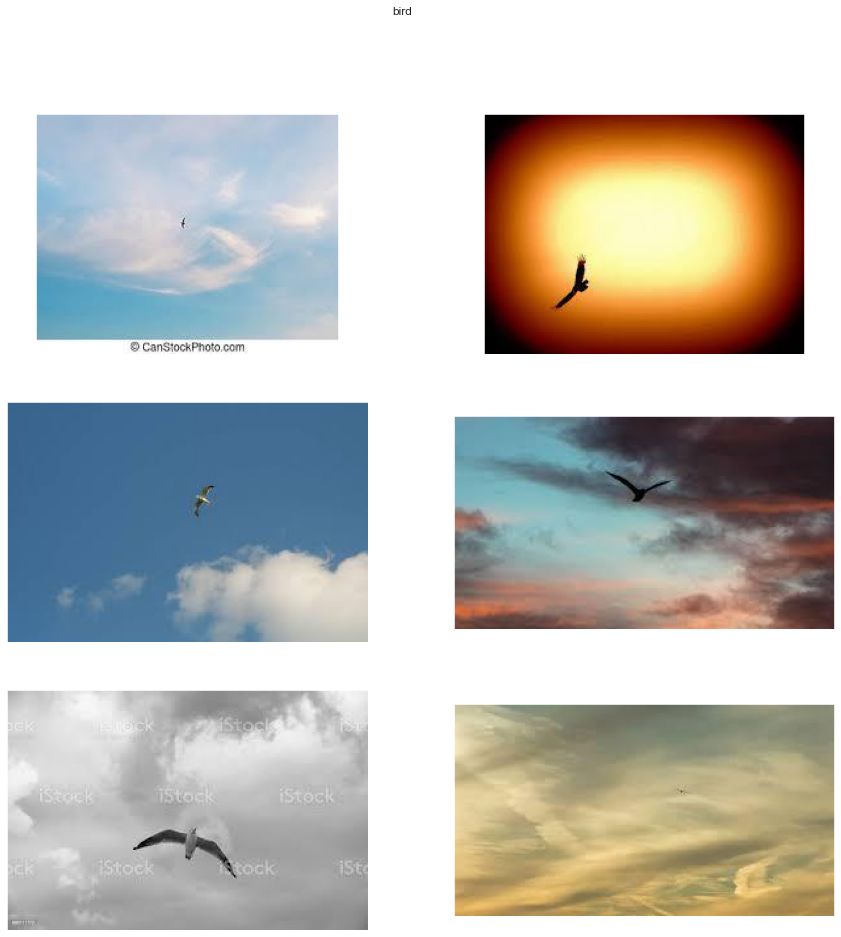

In [9]:
from tensorflow.keras.preprocessing import image

label = 'bird' 
data = df[df['label'] == label]
sns.set_style('dark')


pics = 5
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('bird')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

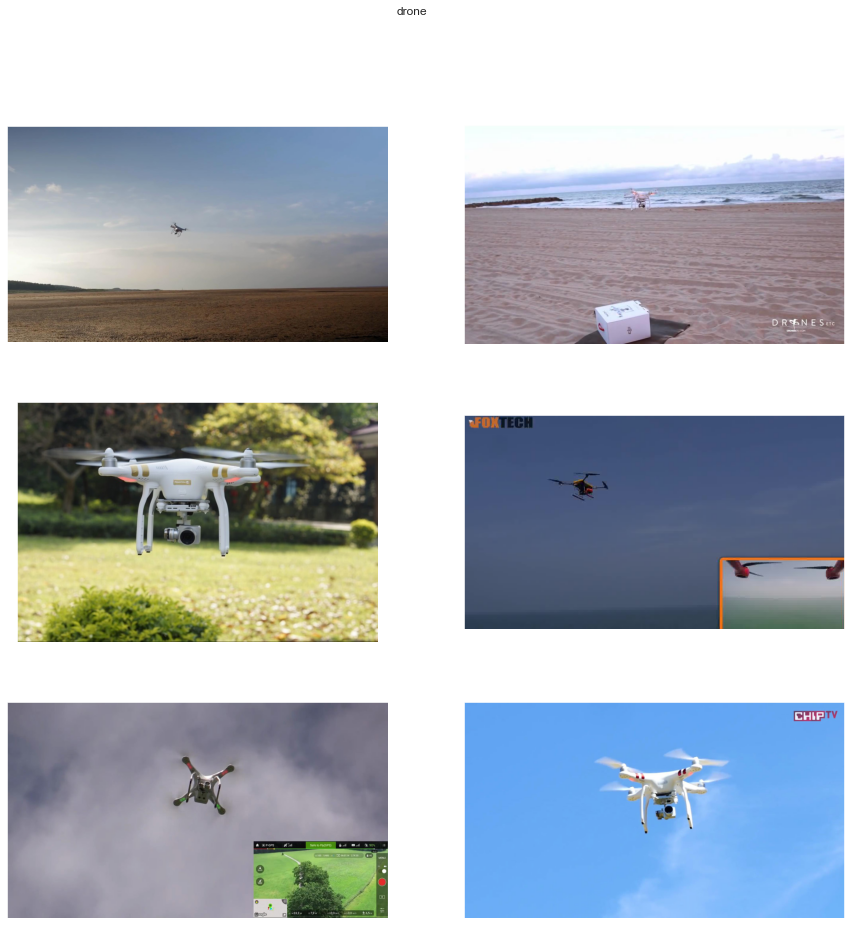

In [10]:
label = 'drone'
data = df[df['label'] == label]
sns.set_style('dark')


pics = 5 
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('drone')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

In [11]:
generator = ImageDataGenerator(
        rescale = 1/255,
        validation_split=0.2,
        rotation_range=8, 
        width_shift_range=0.1, # horizontal shift
        height_shift_range=0.1, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.8,1.3] # brightness
)

In [12]:
train_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',target_size=(256,256),
                                          batch_size=32,
                                          class_mode='categorical',subset='training',seed=42)
val_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',target_size=(256,256),
                                        batch_size=32,
                                        class_mode='categorical',subset='validation',seed=42)

Found 661 validated image filenames belonging to 2 classes.
Found 165 validated image filenames belonging to 2 classes.


In [13]:
train_gen.image_shape

(256, 256, 3)

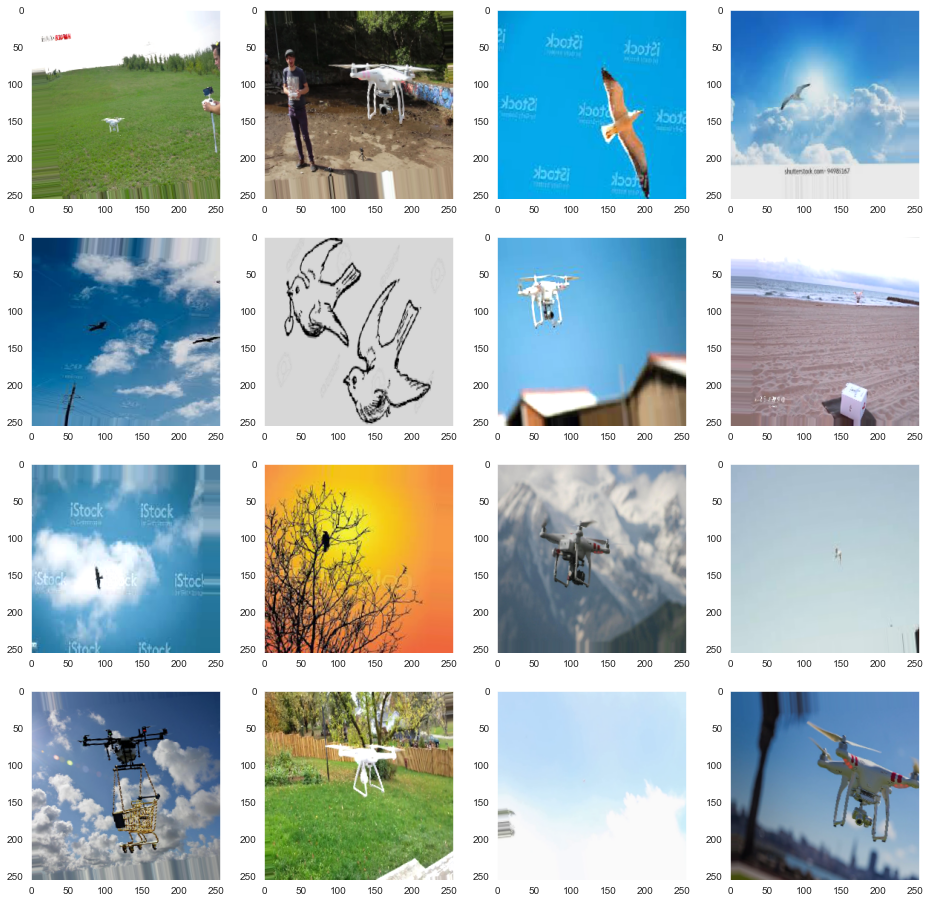

In [14]:
w = 10
h = 10

x= train_gen.next()
image = x[0]
fig = plt.figure(figsize=(16, 16))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = image[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [15]:
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
#     print(image.shape)
    return image

In [16]:
image = cv.imread(r'C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\data\BirdVsDrone\Birds\singleBirdinsky0.jpeg')

img=to_grayscale_then_rgb(image)
print(img.shape)

(598, 900, 1)


In [17]:
generator_grey = ImageDataGenerator(
        rescale = 1/255,
        validation_split=0.2,
        rotation_range=8, # rotation
        width_shift_range=0.1, # horizontal shift
        height_shift_range=0.1, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.8,1.3] # brightness
    
)

In [18]:
train_gen_grey = generator_grey.flow_from_dataframe(df,x_col='path',y_col='label',target_size=(256,256),
                                          batch_size=32,
                                        color_mode='grayscale',
                                          class_mode='categorical',subset='training',seed=42)
val_gen_grey = generator_grey.flow_from_dataframe(df,x_col='path',y_col='label',target_size=(256,256),
                                        batch_size=32,
                                      color_mode='grayscale',
                                        class_mode='categorical',subset='validation',seed=42)

Found 661 validated image filenames belonging to 2 classes.
Found 165 validated image filenames belonging to 2 classes.


In [19]:
train_gen_grey.image_shape

(256, 256, 1)

In [20]:
val_gen_grey.image_shape

(256, 256, 1)

In [21]:
!pip install wandb

In [22]:
import wandb
wandb.login()

wandb: Currently logged in as: sriramdurgaprasads (dl_siddis). Use `wandb login --relogin` to force relogin


True

In [23]:
from wandb.keras import WandbCallback

wandb.init(project="Bird-Vs-Drone", entity="dl_siddis")

In [24]:
wandb.config = {
  "learning_rate": 0.0001,
  "epochs": 15,
  "batch_size": 32,
  "loss":'categorical_crossentropy',
}

# ... Define a model

model = tf.keras.Sequential([
    Flatten(input_shape=(256, 256, 1)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(2,activation='softmax')
])

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
history=model.fit(
        train_gen_grey,
        epochs=15,
        validation_data=val_gen_grey,
        callbacks=[WandbCallback()]
        )

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/15
21/21 [==============================] - ETA: 0s - loss: 0.7152 - accuracy: 0.6067

INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best)... Done. 0.3s


21/21 [==============================] - 20s 895ms/step - loss: 0.7152 - accuracy: 0.6067 - val_loss: 1.7210 - val_accuracy: 0.5394
Epoch 2/15
21/21 [==============================] - ETA: 0s - loss: 0.6307 - accuracy: 0.6581

INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best)... Done. 0.2s


21/21 [==============================] - 18s 877ms/step - loss: 0.6307 - accuracy: 0.6581 - val_loss: 0.8019 - val_accuracy: 0.5697
Epoch 3/15
21/21 [==============================] - ETA: 0s - loss: 0.6269 - accuracy: 0.6309

INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best)... Done. 0.3s


21/21 [==============================] - 18s 838ms/step - loss: 0.6269 - accuracy: 0.6309 - val_loss: 0.7372 - val_accuracy: 0.5394
Epoch 4/15
21/21 [==============================] - ETA: 0s - loss: 0.6076 - accuracy: 0.6596

INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best)... Done. 0.3s


21/21 [==============================] - 18s 859ms/step - loss: 0.6076 - accuracy: 0.6596 - val_loss: 0.7068 - val_accuracy: 0.5273
Epoch 5/15
21/21 [==============================] - ETA: 0s - loss: 0.6112 - accuracy: 0.6626

INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best)... Done. 0.2s


21/21 [==============================] - 18s 863ms/step - loss: 0.6112 - accuracy: 0.6626 - val_loss: 0.6745 - val_accuracy: 0.5636
Epoch 6/15
21/21 [==============================] - 16s 750ms/step - loss: 0.5893 - accuracy: 0.6687 - val_loss: 0.7329 - val_accuracy: 0.6000
Epoch 7/15
21/21 [==============================] - 16s 769ms/step - loss: 0.5748 - accuracy: 0.6838 - val_loss: 0.7098 - val_accuracy: 0.5879
Epoch 8/15
21/21 [==============================] - 16s 760ms/step - loss: 0.6059 - accuracy: 0.6657 - val_loss: 1.3435 - val_accuracy: 0.5152
Epoch 9/15
21/21 [==============================] - 16s 747ms/step - loss: 0.5574 - accuracy: 0.7201 - val_loss: 0.6937 - val_accuracy: 0.5576
Epoch 10/15
21/21 [==============================] - ETA: 0s - loss: 0.5751 - accuracy: 0.6959

INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best)... Done. 0.3s


21/21 [==============================] - 18s 841ms/step - loss: 0.5751 - accuracy: 0.6959 - val_loss: 0.6495 - val_accuracy: 0.6364
Epoch 11/15
21/21 [==============================] - 16s 767ms/step - loss: 0.5714 - accuracy: 0.6868 - val_loss: 0.6987 - val_accuracy: 0.5818
Epoch 12/15
21/21 [==============================] - 16s 758ms/step - loss: 0.5553 - accuracy: 0.7110 - val_loss: 0.7023 - val_accuracy: 0.5939
Epoch 13/15
21/21 [==============================] - 16s 760ms/step - loss: 0.5515 - accuracy: 0.6884 - val_loss: 0.7311 - val_accuracy: 0.6424
Epoch 14/15
21/21 [==============================] - 16s 763ms/step - loss: 0.5453 - accuracy: 0.7171 - val_loss: 0.7143 - val_accuracy: 0.5212
Epoch 15/15
21/21 [==============================] - 16s 764ms/step - loss: 0.5469 - accuracy: 0.7080 - val_loss: 0.7931 - val_accuracy: 0.5636


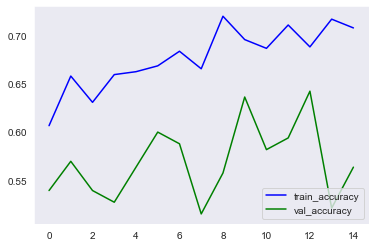

In [27]:
hist=history.history
plt.plot(hist["accuracy"],color="b",label="train_accuracy")
plt.plot(hist["val_accuracy"],color="g",label="val_accuracy")
plt.legend(loc="lower right")
plt.show()

In [28]:
model.evaluate(train_gen_grey)

21/21 [==============================] - 11s 533ms/step - loss: 0.6560 - accuracy: 0.6309


[0.656045138835907, 0.6308623552322388]

In [29]:
model.evaluate(val_gen_grey)

6/6 [==============================] - 3s 458ms/step - loss: 0.7443 - accuracy: 0.5394


[0.7442748546600342, 0.539393961429596]

In [30]:
input_layer=Input(shape=(256,256,3))
layer=Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same")(input_layer)
layer=MaxPool2D(pool_size=(2,2),strides=(1,1))(layer)
layer=BatchNormalization()(layer)
layer=Dropout(0.5)(layer)

layer=Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same")(input_layer)
layer=MaxPool2D(pool_size=(2,2),strides=(1,1))(layer)
layer=BatchNormalization()(layer)
layer=Dropout(0.5)(layer)

layer=Conv2D(filters=16,kernel_size=(3,3),activation="relu",padding="same")(input_layer)
layer=MaxPool2D(pool_size=(2,2),strides=(1,1))(layer)
layer=BatchNormalization()(layer)
layer=Dropout(0.5)(layer)

layer=Flatten()(layer)

layer=Dense(64,activation="relu")(layer)
layer=BatchNormalization()(layer)
layer=Dropout(0.5)(layer)

layer=Dense(32,activation="relu")(layer)
output_layer=Dense(2,activation="softmax")(layer)
model2=Model(inputs=input_layer,outputs=output_layer)
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 255, 255, 16)     0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 255, 255, 16)     64        
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 255, 255, 16)      0         
                                                                 
 flatten_1 (Flatten)         (None, 1040400)           0     

In [31]:
model2.compile(loss='categorical_crossentropy',
       optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
       metrics=['accuracy'])

In [32]:
history2 = model2.fit(
    train_gen,
    epochs=15,
    validation_data=val_gen,
    callbacks=[WandbCallback()]
)

Epoch 1/15
21/21 [==============================] - 60s 3s/step - loss: 0.8273 - accuracy: 0.6278 - val_loss: 0.8044 - val_accuracy: 0.4848
Epoch 2/15
21/21 [==============================] - 71s 3s/step - loss: 0.6835 - accuracy: 0.6445 - val_loss: 0.6982 - val_accuracy: 0.5333
Epoch 3/15
21/21 [==============================] - 83s 4s/step - loss: 0.6647 - accuracy: 0.6581 - val_loss: 0.7133 - val_accuracy: 0.5273
Epoch 4/15
21/21 [==============================] - 77s 4s/step - loss: 0.6484 - accuracy: 0.6838 - val_loss: 0.6709 - val_accuracy: 0.5939
Epoch 5/15
21/21 [==============================] - ETA: 0s - loss: 0.6105 - accuracy: 0.7005

INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best)... Done. 2.2s


21/21 [==============================] - 75s 4s/step - loss: 0.6105 - accuracy: 0.7005 - val_loss: 0.6495 - val_accuracy: 0.6000
Epoch 6/15
21/21 [==============================] - ETA: 0s - loss: 0.6328 - accuracy: 0.6732

INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best)... Done. 2.0s


21/21 [==============================] - 81s 4s/step - loss: 0.6328 - accuracy: 0.6732 - val_loss: 0.6302 - val_accuracy: 0.6727
Epoch 7/15
21/21 [==============================] - 76s 4s/step - loss: 0.5586 - accuracy: 0.7126 - val_loss: 0.6410 - val_accuracy: 0.6424
Epoch 8/15
21/21 [==============================] - ETA: 0s - loss: 0.5664 - accuracy: 0.7247

INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best)... Done. 2.0s


21/21 [==============================] - 76s 4s/step - loss: 0.5664 - accuracy: 0.7247 - val_loss: 0.6031 - val_accuracy: 0.6848
Epoch 9/15
21/21 [==============================] - 3614s 181s/step - loss: 0.5114 - accuracy: 0.7428 - val_loss: 0.6249 - val_accuracy: 0.6485
Epoch 10/15
21/21 [==============================] - 52s 2s/step - loss: 0.5121 - accuracy: 0.7595 - val_loss: 0.6358 - val_accuracy: 0.6303
Epoch 11/15
21/21 [==============================] - 53s 2s/step - loss: 0.5135 - accuracy: 0.7368 - val_loss: 0.6262 - val_accuracy: 0.6667
Epoch 12/15
21/21 [==============================] - ETA: 0s - loss: 0.5118 - accuracy: 0.7519

INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best)... Done. 2.1s


21/21 [==============================] - 59s 3s/step - loss: 0.5118 - accuracy: 0.7519 - val_loss: 0.5855 - val_accuracy: 0.6485
Epoch 13/15
21/21 [==============================] - ETA: 0s - loss: 0.4631 - accuracy: 0.7791

INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best)... Done. 2.1s


21/21 [==============================] - 63s 3s/step - loss: 0.4631 - accuracy: 0.7791 - val_loss: 0.5582 - val_accuracy: 0.6970
Epoch 14/15
21/21 [==============================] - 56s 3s/step - loss: 0.4618 - accuracy: 0.7912 - val_loss: 0.5649 - val_accuracy: 0.6848
Epoch 15/15
21/21 [==============================] - ETA: 0s - loss: 0.4723 - accuracy: 0.7534

INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best)... Done. 2.2s


21/21 [==============================] - 61s 3s/step - loss: 0.4723 - accuracy: 0.7534 - val_loss: 0.5568 - val_accuracy: 0.7030


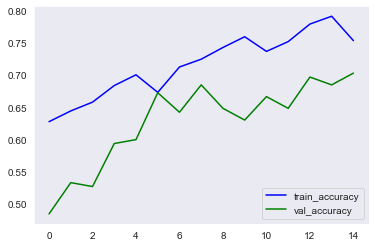

In [33]:
hist=history2.history
plt.plot(hist["accuracy"],color="b",label="train_accuracy")
plt.plot(hist["val_accuracy"],color="g",label="val_accuracy")
plt.legend(loc="lower right")
plt.show()  

In [34]:
model2.evaluate(train_gen)

21/21 [==============================] - 22s 1s/step - loss: 0.5442 - accuracy: 0.7156


[0.5441842675209045, 0.7155824303627014]

In [35]:
model2.evaluate(val_gen)

6/6 [==============================] - 5s 858ms/step - loss: 0.5373 - accuracy: 0.6848


[0.5373049974441528, 0.6848484873771667]

In [36]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [37]:
resnet_model.add(Flatten())
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(2, activation='softmax'))

In [38]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 256)               524544    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 2)                 130       
                                                                 
Total params: 24,153,538
Trainable params: 565,826
Non

In [39]:
resnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

history_resnet = resnet_model.fit(train_gen, validation_data=val_gen, epochs=15,callbacks=[WandbCallback()])

Epoch 1/15
21/21 [==============================] - 97s 4s/step - loss: 0.6909 - accuracy: 0.5582 - val_loss: 0.6678 - val_accuracy: 0.7212
Epoch 2/15
21/21 [==============================] - 100s 5s/step - loss: 0.6567 - accuracy: 0.6808 - val_loss: 0.6552 - val_accuracy: 0.7152
Epoch 3/15
21/21 [==============================] - 140s 7s/step - loss: 0.6480 - accuracy: 0.6248 - val_loss: 0.6485 - val_accuracy: 0.6545
Epoch 4/15
21/21 [==============================] - 156s 7s/step - loss: 0.6295 - accuracy: 0.6626 - val_loss: 0.6271 - val_accuracy: 0.6970
Epoch 5/15
21/21 [==============================] - 164s 8s/step - loss: 0.6163 - accuracy: 0.6808 - val_loss: 0.6145 - val_accuracy: 0.7273
Epoch 6/15
21/21 [==============================] - 158s 8s/step - loss: 0.6158 - accuracy: 0.6445 - val_loss: 0.6154 - val_accuracy: 0.7455
Epoch 7/15
21/21 [==============================] - 157s 8s/step - loss: 0.5995 - accuracy: 0.6944 - val_loss: 0.6084 - val_accuracy: 0.6545
Epoch 8/15
21/

INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best)... Done. 0.3s


21/21 [==============================] - 192s 9s/step - loss: 0.5758 - accuracy: 0.6959 - val_loss: 0.5565 - val_accuracy: 0.7818
Epoch 14/15
21/21 [==============================] - 169s 8s/step - loss: 0.5532 - accuracy: 0.7458 - val_loss: 0.5727 - val_accuracy: 0.7394
Epoch 15/15
21/21 [==============================] - ETA: 0s - loss: 0.5529 - accuracy: 0.7247

INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lenovo\Downloads\MS in IoT\DL\DL Assignments\wandb\run-20230423_161917-dftum711\files\model-best)... Done. 0.3s


21/21 [==============================] - 182s 9s/step - loss: 0.5529 - accuracy: 0.7247 - val_loss: 0.5380 - val_accuracy: 0.7576


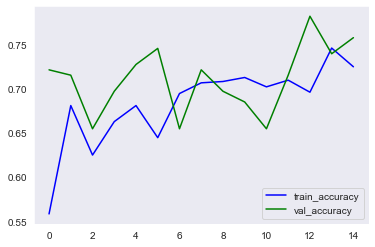

In [40]:
 hist=history_resnet.history
plt.plot(hist["accuracy"],color="b",label="train_accuracy")
plt.plot(hist["val_accuracy"],color="g",label="val_accuracy")
# plt.axis(ymin=0.4,ymax=1)
plt.legend(loc="lower right")
plt.show() 

In [41]:
resnet_model.evaluate(train_gen)

21/21 [==============================] - 132s 6s/step - loss: 0.5420 - accuracy: 0.7458


[0.542004406452179, 0.7458396553993225]

In [42]:
resnet_model.evaluate(val_gen)

6/6 [==============================] - 25s 4s/step - loss: 0.5566 - accuracy: 0.7697


[0.5566377639770508, 0.7696969509124756]

In [43]:
files=val_gen.filenames
class_dict=val_gen.class_indices 
rev_dict={}
for key, value in class_dict.items():
    rev_dict[value]=key   

In [44]:
predictions = resnet_model.predict(val_gen)

6/6 [==============================] - 28s 4s/step


In [45]:
from keras.preprocessing import image

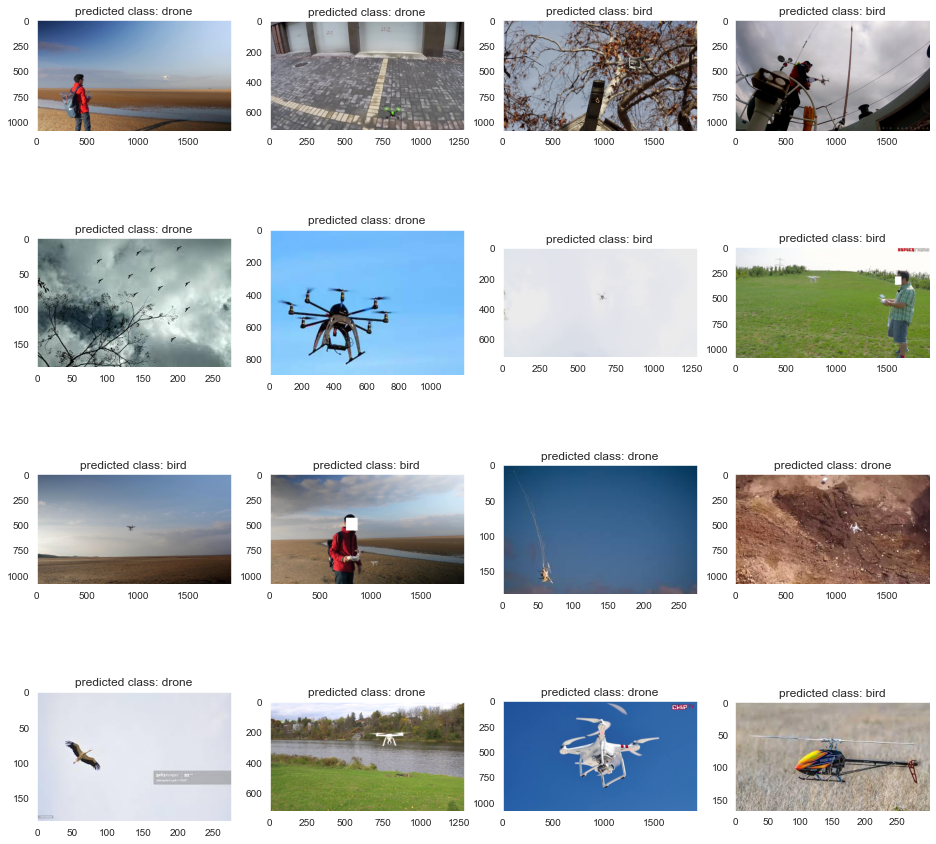

In [46]:
fig = plt.figure(figsize=(16, 16))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    index=np.argmax(predictions[i])
    klass=rev_dict[index] 
    im = Image.open(files[i])
    img=np.array(im)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.title(f'predicted class: { klass}')
plt.show()


In [47]:
dict_path=dict(zip(df.path, df.label))

In [48]:
dict_path[files[i]]

'drone'

In [49]:
len(predictions)

165

In [50]:
cnt=0
columns = 6
rows = 6
for i in range(1, 165):
    index=np.argmax(predictions[i])
    pred_class=rev_dict[index] 
    actual_label=dict_path[files[i]]
    if(actual_label!=pred_class):
       cnt+=1
print(f'Number of misclassified example {cnt} out of {len(predictions)} examples')

Number of misclassified example 80 out of 165 examples


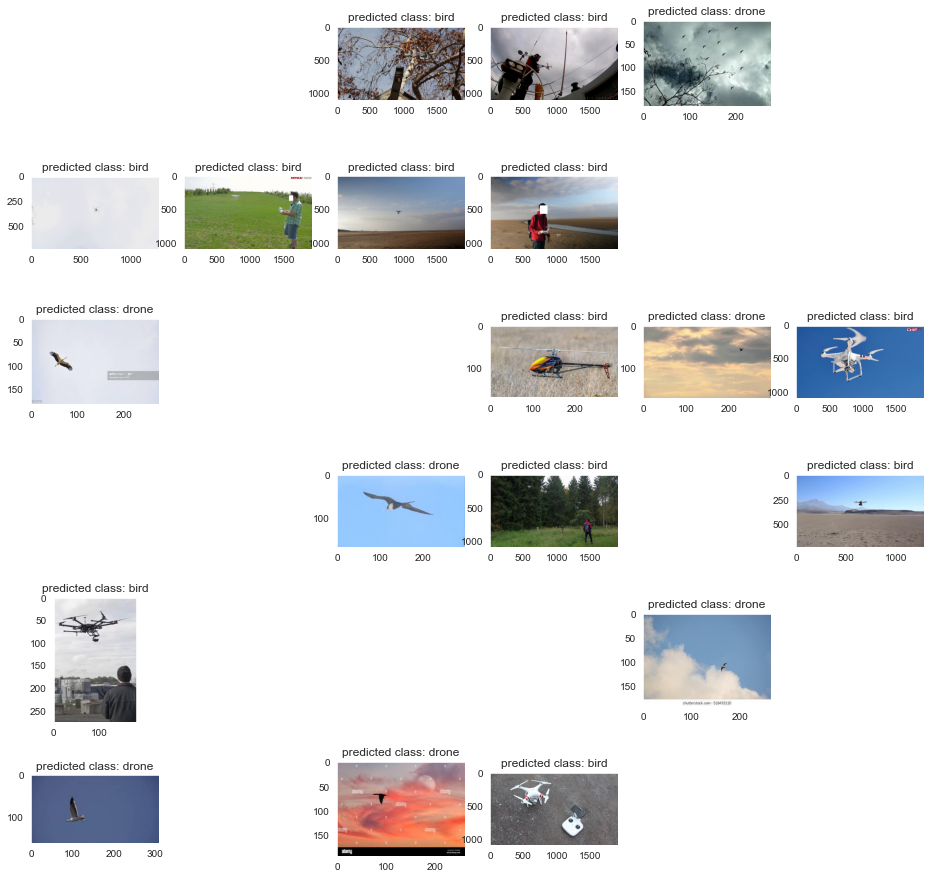

In [51]:
fig = plt.figure(figsize=(16, 16))
columns = 6
rows = 6
for i in range(1, columns*rows +1):
    index=np.argmax(predictions[i])
    pred_class=rev_dict[index] 
    im = Image.open(files[i])
    actual_label=dict_path[files[i]]
    if(actual_label!=pred_class):
        img=np.array(im)
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        plt.title(f'predicted class: { pred_class}')
plt.show()